In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('C:\\Users\\usuario\Platzi\portfolio\gdp_analysis\gdp-per-capita.csv')
df=pd.pivot_table(df,index='Year',columns='Entity', values='GDP per capita')
df=df.drop(columns=['South and South-East Asia',
                 'Sub-Sahara Africa',
                 'Sub-Sahara Africa',
                 'Western Europe',
                 'Western Offshoots',
                 'World',
                'Latin America'])
df=df.loc[1800:,:]



In [88]:
ranking_df=[]
for year in df.index:
    ranking=(
    df.loc[year,:]
    .pipe(lambda df:df[df.notna()])
    .sort_values(ascending=False)
    .reset_index()
    .reset_index()
    .set_index('Entity')
    .drop(columns=year)
    .rename(columns={'index':year})
    )
    ranking_df.append(ranking)

ranking_df=pd.concat(ranking_df,axis=1).T
    

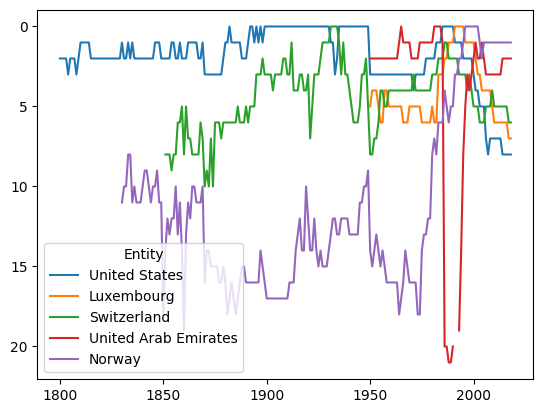

In [113]:
top_10_2018=ranking_df.loc[1968:,:].mean().sort_values().head(5).index
ranking_df[top_10_2018].plot()
plt.gca().invert_yaxis()
plt.show()


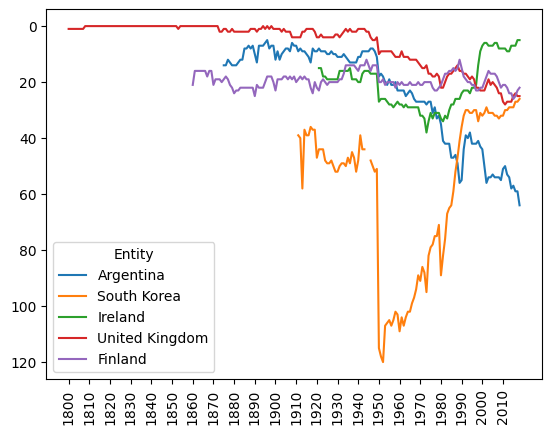

In [118]:
ranking_df[['Argentina','South Korea','Ireland','United Kingdom','Finland']].plot()
plt.xticks(np.arange(1800,2018,10),rotation=90)
plt.gca().invert_yaxis()